<a href="https://colab.research.google.com/github/SaiArjunSairamje/Probability-and-Stats/blob/main/Prob%20%26%20Stats%20(Personal%20Notes)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF       # Empirical CDF (i.e. Empirical means from a data) --> "Descriptive Statistics"
from scipy import stats         # stats.mode --> "Descriptive Stats"
from scipy.stats import norm        # norm.cdf  # norm.ppf  # norm.interval --> "Gaussian Distribution"
import math       # math.prob  # math.comb --> "Combinatorics (i.e. Permutation & Combination)"
from scipy.stats import binom, geom         # binom.pmf # geom.pmf # binom.cdf --> "Binomial & Geometric Distribution"

# <center>**Data Analytics and Visualisation - Probability and Stats**</center>
***

**Part 1**
  - Probability - Basic Definitions
  - Conditional Probability
  - Bayes Theorem 1
  - Bayes Theorem 2

**Part 2**
  - Descriptive Statistics
  - Gaussian Distribution
  - Central Limit Theorem
  - Confidence Interval

**Part 3**
  - Combinatorics
  - Binomial and Geometric distributions

# <center>`Part 1.1:` **Probability - Basic Definitions**</center>
***


In [ ]:
df_sachin = pd.read_csv("Sachin_ODI.csv")

In [ ]:
df_sachin.shape

(360, 14)

In [ ]:
df_sachin.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


Even though we have multiple columns appearing above, we are only going to learn weather **India won a match `("Won" column)`** & if **Sachin scored a centurey `("century" column)`**

## **What is the probability of winning?**

In [ ]:
df_sachin["Won"].value_counts()

True     184
False    176
Name: Won, dtype: int64

**Approach (1): Manual code**

In [ ]:
prob_winning = 184/(184 + 176)
prob_winning

0.5111111111111111

**Approach (2): Python code approach**

In [ ]:
df_won = df_sachin[df_sachin["Won"]==True]

In [ ]:
len(df_won)

184

In [ ]:
prob_winning = len(df_won) / len(df_sachin)
prob_winning

0.5111111111111111

## **What is the probability of century?**

In [ ]:
df_sachin["century"].value_counts()

False    314
True      46
Name: century, dtype: int64

**Approach (1): Manual code**

In [ ]:
prob_century = 46 / (314 + 46)
prob_century

0.12777777777777777

**Approach (2): Python code approach**

In [ ]:
df_century = df_sachin[df_sachin["century"]==True]

In [ ]:
len(df_century)

46

In [ ]:
prob_century = len(df_century) / len(df_sachin)
prob_century

0.12777777777777777

## **Winning and century**

In [ ]:
df_sachin[["century", "Won"]].value_counts()

century  Won  
False    False    160
         True     154
True     True      30
         False     16
dtype: int64

In [ ]:
df_sachin[["century", "Won"]].value_counts().unstack()

Won,False,True
century,,
False,160,154
True,16,30


In [ ]:
# Contingency table
pd.crosstab(index=df_sachin["century"], columns=df_sachin["Won"], margins=True)

Won,False,True,All
century,,,
False,160,154,314
True,16,30,46
All,176,184,360


### **Given the Contingency table above, What is the probability of Winning AND century?**

Breaking down the question asked:

1. In how many matches has winning and century happened? **`30`**
2. Totally how many matches are there? **`360`**
3. What is the probability of winning and century? **`30/360`**

In [ ]:
'''
Which of these lines of code will get us the matches with century AND winning?

Click on an option to submit your answer

A. df_sachin[(df_sachin["century"] == False) & (df_sachin["Won"] == False)]
B. df_sachin[(df_sachin["century"] == True) and (df_sachin["Won"] == True)]
C. df_sachin[(df_sachin["century"] == True) | (df_sachin["Won"] == True)]
D. df_sachin[(df_sachin["century"] == True) & (df_sachin["Won"] == True)]
'''

In [ ]:
df_win_and_century = df_sachin[(df_sachin["century"] == True) & (df_sachin["Won"] == True)]

In [ ]:
len(df_win_and_century)

30

In [ ]:
prob_win_and_century = len(df_win_and_century) / len(df_sachin)
prob_win_and_century

0.08333333333333333

In [ ]:
30/360

0.08333333333333333

### **Given the Contingency table, What is the probability of Winning OR century?**

In [ ]:
pd.crosstab(index=df_sachin["century"], columns=df_sachin["Won"], margins=True)

Won,False,True,All
century,,,
False,160,154,314
True,16,30,46
All,176,184,360


Let's breakdown the question asked for better understanding:

1. In how many matches will winning or century happen?

    a) 184 + 46            
    b) 184 + 16             
    c) 154 + 16             
    d) 184 + 46 - 30

In [ ]:
184 + 46 - 30     # This is as per Probability of Union --> P(A ∪ B) = P(A) + P(B) - P(A ∩ B)

200

In [ ]:
df_win_or_century = df_sachin[(df_sachin["century"] == True) | (df_sachin["Won"] == True)]

In [ ]:
len(df_win_or_century)

200

In [ ]:
prob_win_or_century = len(df_win_or_century) / len(df_sachin)
prob_win_or_century

0.5555555555555556

In [ ]:
200/360

0.5555555555555556

In [ ]:
prob_winning + prob_century - prob_win_and_century      # P(W ∪ C) = P(W) + P(C) - P(W ∩ C)

0.5555555555555555

### **Complement - Win and loss**

In [ ]:
df_won = df_sachin[df_sachin["Won"]==True]
prob_won = len(df_won) / len(df_sachin)
prob_won

0.5111111111111111

In [ ]:
df_lost = df_sachin[df_sachin["Won"]==False]
prob_lost = len(df_lost) / len(df_sachin)
prob_lost

0.4888888888888889

In [ ]:
prob_won + prob_lost

1.0

### **Atleast 8 fours are scored**

* Atleast 8 fours are scored
* **Complement**: At most 7 fours

In [ ]:
df_at_least_eight_fours = df_sachin[df_sachin["fours"] >= 8]
prob_at_least_eight_fours = len(df_at_least_eight_fours) / len(df_sachin)
prob_at_least_eight_fours

0.26666666666666666

In [ ]:
len(df_at_least_eight_fours)

96

In [ ]:
df_at_most_seven_fours = df_sachin[df_sachin["fours"] <= 7]
prob_at_most_seven_fours = len(df_at_most_seven_fours) / len(df_sachin)
prob_at_most_seven_fours

0.7333333333333333

In [ ]:
len(df_at_most_seven_fours)

264

In [ ]:
prob_at_least_eight_fours + prob_at_most_seven_fours

1.0

# <center>`Part 1.2:` **Conditional Probability**</center>
***

# <center>`Part 1.3:` **Bayes' Theorem**</center>
***

In [ ]:
'''
Q. It is known that 5% of all LinkedIn users are premium users. A LinkedIn survey found that 10% of premium users are actively seeking new job opportunities,
while only 2% of non-premium users are actively seeking new job opportunities. A randomly selected user is actively seeking new job opportunities,
what is the probability that the user is a non-premium user?


# Given probabilities

P_A = 0.05 # Probability of being a premium user
P_B_given_A = 0.1 # Probability of seeking a job given a premium user
P_B_given_not_A = 0.02 # Probability of seeking a job given not a premium user

# Calculate probabilities

P_not_A = 1 - P_A # Probability of not being a premium user
P_B = P_B_given_A * P_A + P_B_given_not_A * P_not_A # Total probability of seeking a job
P_not_A_given_B = (P_B_given_not_A * P_not_A) / P_B # Probability of not being a premium user given seeking a job
print(P_not_A_given_B)

using Bayes theorem:

P(Premium) = 0.05 P(Non Premium) = 0.95
P(Seeking | Premium) = 0.1
P(Seeking | Non Premium) = 0.02

P(Seeking) = {P(Seeking | Premium) * P(Premium)} + {(P(Seeking | Non Premium) * P(Non Premium))}
= (0.1 * 0.05) + (0.02 * 0.95)
= 0.005 + 0.019
= 0.024

By Baye’s theorem :

P(Non Premium | Seeking) = {P(Seeking | Non Premium) * P(Non Premium)} / P(Seeking)
= (0.02 * 0.95) / 0.024
= 0.019 / 0.024
= 0.7916
= 0.792
'''

# <center>`Part 2.1:` **Descriptive Statistics**</center>
***

In [ ]:
'''
Descriptive Statistics (Content):
--------------------------------------
> Intro to Stats: Descriptive Statistics & Inferencial Statistics
> Measures of central tendency (mean, median, mode, weighted average)
> Measure of dispersion (range, percentiles & quartiles, interquartile range (IQR))
> Data visualization (Box plots)
> Outliers
> Cumulative Distribution Function (CDF)
> Data visualization (Histogram Plot) for Distribution of the data points
> Measures of dispersion (variance, standard deviation, range)

* Intro to Statistics: Descriptive Statistics & Inferencial Statistics
* Measures of central tendency (mean, median, mode, weighted average)
  (NOTE: Why Median better than Mean ??? "Median is more robest to outliers")
  Q) There are 4 people whose average age is 24. We know the age of three people: 20, 22, and 28. What is the median age of these 4 people?
  Q) In a survey about favourite animal, 30 people said cat, 40 people said dog, 20 people said cow. Wha is the mode of favourite animals in this data?
  Q) The mean weight of 2 children in a family is 40 Kgs. If the weight of the mother is included, the mean becomes 45. What is the weight of the mother?
  Q) A survey of number of pets in a town saw that 30% people had 0 pets, 40% had 1 pet, 10% had 2 pets, 20% had 3 pets. What is the average number of pets?

* Measure of dispersion
	- Range (i.e. spread of data), variance, and standard deviation
	- Percentiles and quartiles
	- Interquartile range (IQR)
* Data visualization (Box plots)
	- Percentiles, Min, Max
	- IQR (i.e. range b/w 25th & 75th percentiles)
* Calculating Percentiles (25th, 50th (Median), 75th) & Quartiles (Q1, Q2, Q3)
  For Percentiles:
    Approach (1):
	- np.percentile(data[], 25) --> 25th percentile or Q1 quartile
	- np.percentile(data[], 50) --> 50th percentile or Q2 quartile or medium
	- np.percentile(data[], 75) --> 75th percentile or Q3 quartile
    Approach (2):
	- data[].quantile(0.25) -->  Q1 quartile or 25th percentile
	- data[].quantile(0.50) -->  Q2 quartile or 50th percentile or medium
	- data[].quantile(0.75) -->  Q3 quartile or 75th percentile
  For IQR (Interquartile Range):
	- (np.percentile(data[], 75) - np.percentile(data[], 75)) --> (75th percentile - 25th percentile)
* Creating Data visualization (Box plots) for Percentiles & Quartiles
	- sns.boxplot(data = data[], orient = "h")
* Calculating max (i.e. upper) & min (i.e. lower) points
	- upper_bound = min(actual_max, 75_percentile + 1.5*IQR)
	- lower_bound = max(0, 25_percentile - 1.5*IQR)
* How much % of data is above the upper_bound (i.e. outliers)???
	- data_outlier = data[data[] > upper_bound]
	  len(data_outlier)
	  (above_output/count_value_from_describe_function)*100

(NOTE: Using a different dataset)
* Cumulative Distribution Function (CDF) (Connecting CDF to percentiles and cumulative probabilities in dataset)
  Approach (1): Manual code
	- x_values = np.linspace(min_height, max_height, 1000)  --> creating x_axis (NOTE: similar to np.arange())
	  y_values = []
	  for x in x_values:
	  	people_shorter_than_x = df_height[df_height <= x]
    		num_people_shorter_than_x = len(people_shorter_than_x)
		frac_people_shorter_than_x = num_people_shorter_than_x / total
		y_values.append(frac_people_shorter_than_x)
		plt.plot(x_values, y_values)
  Approach (2): Pre-defined library
	- from statsmodels.distributions.empirical_distribution import ECDF  #Expirical CDF
	  e = ECDF(data)
	  plt.plot(e.x, e.y, c = "r")
* Data visualization (Histogram Plot) for Distribution of the data points
	- sns.histplot(data[])
* Measures of dispersion (variance, standard deviation, range)
	- formula for Variance
	- formula for Standard Deviation
'''

In [ ]:
# Measures of central tendency (mean, median, mode, weighted average)
length = [10, 20, 40, 50, 30, 60, 80, 90, 100, 70]

mean = np.mean(length)
median = np.median(length)

from scipy import stats
mode = stats.mode(length)

print(f"Mean: {mean} \nMedia: {median} \nMode: {mode}")

Mean: 55.0 
Media: 55.0 
Mode: ModeResult(mode=10, count=1)


In [ ]:
# Measure of dispersion (range, percentiles & quartiles, interquartile range (IQR))
length = [10, 20, 40, 50, 30, 60 , 80, 90, 100, 70]

range =  np.max(length) - np.min(length)
percentile_50 = np.percentile(length, 50)       # we will learn more details going forward.

print(f"Range: {range} \n50th Percentile: {percentile_50}")

Range: 90 
50th Percentile: 55.0


In [ ]:
# Working with Sehwag & Dravid datasets
sehwag = pd.read_csv("sehwag.csv")
dravid = pd.read_csv("dravid.csv")

In [ ]:
sehwag.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731


In [ ]:
dravid.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,3,-,4,0,0,75.00,4,caught,1,NaN,v Sri Lanka,Singapore,3 Apr 1996,ODI # 1089
1,4,-,7,0,0,57.14,4,run out,1,NaN,v Pakistan,Singapore,5 Apr 1996,ODI # 1091
2,3,-,5,0,0,60.00,5,caught,2,NaN,v Pakistan,Sharjah,12 Apr 1996,ODI # 1094
3,11,28,21,0,0,52.38,8,caught,2,NaN,v South Africa,Sharjah,14 Apr 1996,ODI # 1097
4,22,21,15,3,0,146.66,6,not out,1,NaN,v England,Manchester,26 May 1996,ODI # 1104


## **(1) Let's handle sehwag.csv first**

In [ ]:
sehwag.shape

(245, 14)

In [ ]:
sehwag.describe()

,Runs,BF,4s,6s,SR,Pos,Inns,Unnamed: 9
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.00000,245.000000,0.0
mean,33.767347,32.363265,4.620408,0.555102,93.085755,1.82449,1.530612,NaN
std,34.809419,29.175744,4.583335,1.124442,46.830716,1.24376,0.500084,NaN
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000,NaN
25%,8.000000,10.000000,1.000000,0.000000,65.850000,1.00000,1.000000,NaN
50%,23.000000,25.000000,3.000000,0.000000,92.230000,1.00000,2.000000,NaN
75%,46.000000,42.000000,7.000000,1.000000,123.800000,2.00000,2.000000,NaN
max,219.000000,149.000000,25.000000,7.000000,260.000000,8.00000,2.000000,NaN


In [ ]:
sehwag["Runs"].describe()     # We are handling only the "Runs" column in this dataset

count    245.000000
mean      33.767347
std       34.809419
min        0.000000
25%        8.000000
50%       23.000000
75%       46.000000
max      219.000000
Name: Runs, dtype: float64

### **Calculating Percentiles (25th, 50th `(Median)`, 75th) / Quartiles (Q1, Q2, Q3)**

> **`Approach (1):` np.percentile()**

> **`Approach (2):` dataset[col].quantile()**

In [ ]:
# Approach (1)

In [ ]:
perc_25 = np.percentile(sehwag["Runs"], 25)
perc_25

8.0

In [ ]:
perc_50 = np.percentile(sehwag["Runs"], 50)
perc_50

23.0

In [ ]:
perc_75 = np.percentile(sehwag["Runs"], 75)
perc_75

46.0

In [ ]:
# Approach (2)

In [ ]:
p_25 = sehwag["Runs"].quantile(0.25)      # Q1 or p_25
p_50 = sehwag["Runs"].quantile(0.5)       # Q2 or p_50 or median
p_75 = sehwag["Runs"].quantile(0.75)      # Q3 or p_75
print(p_25, p_50, p_75)

8.0 23.0 46.0


### **Calculating IQR (Interquartile Range)**

In [ ]:
iqr = p_75 - p_25
iqr

38.0

### **Creating Data visualization (Box plots) for Percentiles & Quartiles**

<Axes: >

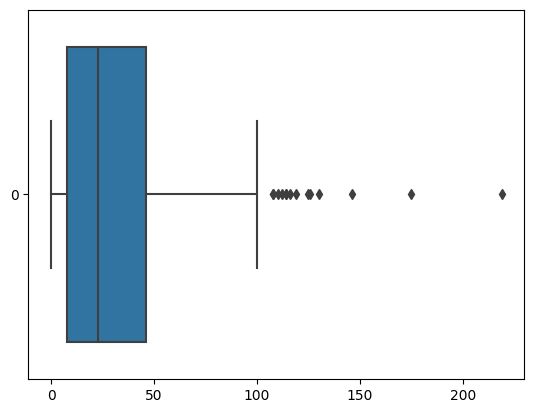

In [ ]:
sns.boxplot(data = sehwag["Runs"], orient = "h")

### **Calculating the max (i.e. upper boundary) & min (i.e. lower boundary) points**

- **upper_bound = min(actual_max, 75_percentile + 1.5*IQR)**
- **lower_bound = max(0, 25_percentile - 1.5*IQR)**

In [ ]:
lower = p_25 - 1.5*iqr
lower

-49.0

In [ ]:
lower = max(0, p_25 - 1.5*iqr)    # since there is no negative marks in crisket, let's keep the maximum lower value as 0
lower

0

In [ ]:
upper = p_75 + 1.5 * iqr      # easier code since we know the 75% percentile
upper

103.0

In [ ]:
upper2 = min(max(sehwag["Runs"]), p_75 + 1.5 * iqr)
upper2

103.0

In [ ]:
print(f"lower: {lower} \nupper: {upper}")

lower: 0 
upper: 103.0


### **Calculating the % of data which is above the upper_bound (i.e. outliers)**


In [ ]:
sehwag_outlier = sehwag[sehwag['Runs'] > upper]      # Masking

In [ ]:
len(sehwag_outlier)       # Number of Outliers

14

In [ ]:
(14/245)*100          # % of Outliers

5.714285714285714

## **(2) Now let's handle dravid.csv `(NOTE: Same code steps as previous)`**

In [ ]:
dravid.shape

(318, 14)

In [ ]:
dravid["Runs"].describe()

count    318.000000
mean      34.242138
std       29.681822
min        0.000000
25%       10.000000
50%       26.000000
75%       54.000000
max      153.000000
Name: Runs, dtype: float64

**Calculating Percentiles (25th, 50th (Median), 75th) / Quartiles (Q1, Q2, Q3)**

In [ ]:
p_25 = np.percentile(dravid["Runs"], 25)
p_25

10.0

In [ ]:
p_50 = np.percentile(dravid["Runs"], 50)
p_50

26.0

In [ ]:
p_75 = np.percentile(dravid["Runs"], 75)
p_75

54.0

**Calculating IQR (Interquartile Range)**

In [ ]:
iqr = p_75 - p_25
iqr

44.0

**Creating Data visualization (Box plots) for Percentiles & Quartiles**

<Axes: >

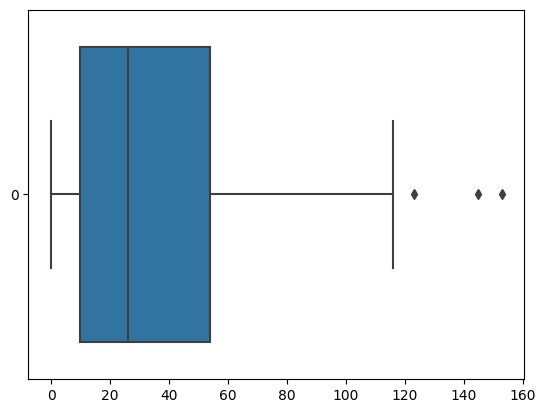

In [ ]:
sns.boxplot(data = dravid["Runs"], orient = "h")

**Calculating the max (i.e. upper boundary) & min (i.e. lower boundary) points**

In [ ]:
lower = max(0, p_25 - 1.5 * iqr)
lower

0

In [ ]:
upper = p_75 + 1.5 * iqr
upper

120.0

In [ ]:
print(f"lower: {lower}, \nupper: {upper}")

lower: 0, 
upper: 120.0


**Calculating the % of data which is above the upper_bound (i.e. outliers)**

In [ ]:
dravid_outlier = dravid[dravid['Runs'] > upper]      # Masking

In [ ]:
len(dravid_outlier)       # Number of outliers

3

In [ ]:
(3 / 318) * 100       # % of Outliers

0.9433962264150944

## **(3) Let's work on weight-height.csv**

In [ ]:
df_hw = pd.read_csv("weight-height.csv")
df_hw

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
df_hw["Height"].describe()    # inch

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [ ]:
df_height = df_hw["Height"]

In [ ]:
min_height = df_height.min()

In [ ]:
max_height = df_height.max()

In [ ]:
print(min_height, max_height)

54.2631333250971 78.9987423463896


In [ ]:
total = len(df_height)
total

10000

### **Cumulative Distribution Function (CDF)**

Cumulative Distribution Function (CDF) `(Connecting CDF to percentiles and cumulative probabilities in dataset)`

> **`Approach (1):` Manual code**

> **`Approach (2):` from statsmodels.distributions.empirical_distribution import ECDF `(i.e. Empirical CDF)`**

In [ ]:
# Approach (1)

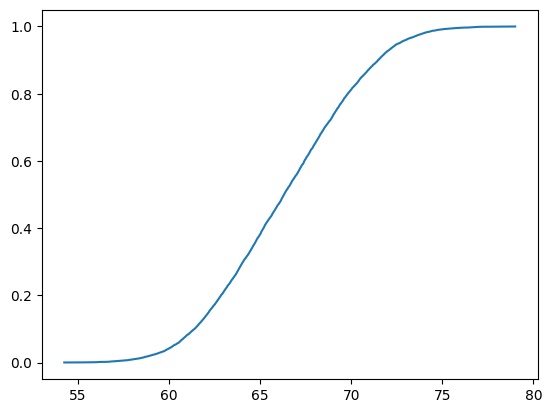

In [ ]:
x_values = np.linspace(min_height, max_height, 1000)
y_values = []

for x in x_values:
    people_shorter_than_x = df_height[df_height <= x]     # Masking

    num_people_shorter_than_x = len(people_shorter_than_x)        # Number of people_shorter_than_x

    frac_people_shorter_than_x = num_people_shorter_than_x / total        # Fraction of people_shorter_than_x

    y_values.append(frac_people_shorter_than_x)        # Appending the list having fraction of people_shorter_than_x

plt.plot(x_values, y_values)

In [ ]:
# Approach (2)

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF       # Empirical CDF (i.e. Empirical means from a data)

In [ ]:
e = ECDF(df_height)

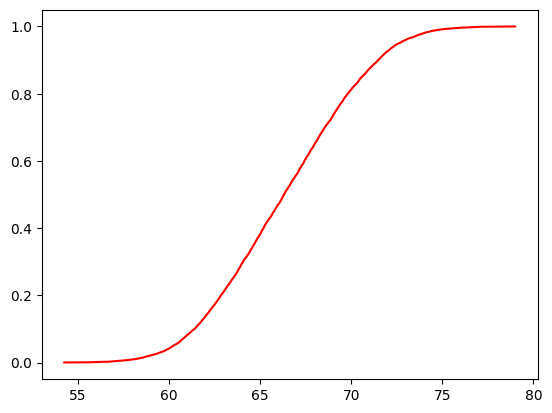

In [ ]:
plt.plot(e.x, e.y, c = "r")

In [ ]:
df_height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

### **Data visualization (Histogram Plot) for Distribution of the data points**

<Axes: xlabel='Height', ylabel='Count'>

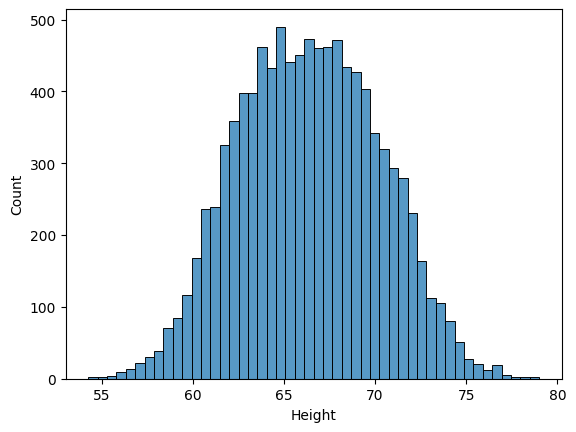

In [ ]:
sns.histplot(df_height)

# <center>`Part 2.2:` **Gaussian distribution** `(weight-height.csv dataset)`</center>
***

In [ ]:
'''
Gaussian Distribution (Content):
--------------------------------------
> 68/95/99 Rule (Emperical Rule)
> (1) Z-Score (2) Z-Table Vs Python Library (SciPy)
> Computing Prob
> Actual example

* 68/95/99 Rule (Emperical Rule)
	- 68% of the data falls within 1 standard deviation of the mean (μ ± σ) in a normal distribution
	- 95% of the data falls within 2 standard deviations of the mean (μ ± 2σ) in a normal distribution
	- 99.7% of the data falls within 3 standard deviations of the mean (μ ± 3σ) in a normal distribution
  Q) The height of people is Gaussian with mean 65 inches and standard deviation 2.5 inches.
		(Q1) If I randomly meet one of these people, what is the probability their height is between 60 and 62.5 inches?
 		(Q2) What fraction of people are shorter than 67.5?
		(Q3) What is the fraction of people whose height is between 60 and 72.5?

* IMP: CDF and Percentile (a.k.a. Fraction) are inverse of each other
  The CDF gives the cumulative probability up to a specific value, while percentiles provide the value below which a specified percentage of data falls. These two concepts complement each other and are essential in understanding and analyzing data distributions.
	- CDF --> Given the x-axis (input value), you can find the y-axis value (i.e. cumulative probability (a.k.a. fraction)) using CDF
	- Percentile (a.k.a. Fraction) --> Given the y-axis (i.e. cumulative probability (a.k.a. fraction)), you can find the x-axis value using percentiles

* NOTE: There are 2 types of handling Gaussian Distribution queries:
	(1) Using 68/95/97 rule as shown previously
	(2) General approach (i.e. under "Calculating Probabilities and Percentiles" topic)
		- when the questions is based on "shorter/lesser than"
		- when the questions is based on "between range"

* Computing Probabilities (i.e. y-axis) and Percentiles (i.e. x-axis)
  General approach to find fraction (i.e. percentage) given x-axis input value. That is, CDF: "given height --> tell me the fraction"
  Step (1)-Q) Given a person with hight 69.1 inch, how much standard deviation away it is from from the mean?
		- 69.1 = 65 + (z)2.5
	  	  z = (69.1 - 65) / 2.5
	  	  z = 1.64
		  That is,
	  	  z = (height - mean) / standard_deviation
  Step (2)-Q) What fraction of people are shorter than 69.1 inch?
		- Approach (1): Z-Score table (Link: https://www.z-table.com/)
		- Approach (2): Python Scipy library

  Q) What fraction of people have height less than 70.8 inch?
  Step (1): Z Score Calculation
	 	70.8 = 65 + (z)2.5
	  	z = (70.8 - 65) / 2.5
	  	z = 2.32
  Step (2):
	- Approach (1) --> Z-Score table
	  	Z-Score Table = 0.9898
	- Approach (2) --> Python Scipy
		from scipy.stats import norm
		z = (x_value - mean)/std   #Z Score Calculation
		norm.cdf(z)	# Alternative to Z-Score Table

  Q) Balls produced by manufacturer have mean 50 mm and std dev 2 mm. What fraction of balls are smaller than 53 mm?	(Ans: 0.93)

* Deriving the Emperical Rule (68/95/99 Rule)
  NOTE: norm.cdf() --> gives o/p based on questions asked in "shorter/lesser than"
	norm.cdf() - norm.cdf() --> gives o/p based on questions asked in "between range"
  Fraction of people having hegith between 1 standard deviation from the mean
	- norm.cdf(1)  #z = (67.5 - 65)/2.5 = 2.5/2.5 = 1
	  norm.cdf(-1)  #z = (62.5 - 65)/2.5 = -2.5/2.5 = -1
	  norm.cdf(1) - norm.cdf(-1)  #give o/p 0.68268...
  Fraction of people having hegith between 2 standard deviation from the mean
	- norm.cdf(2) - norm.cdf(-2)  #give o/p 0.9544...
  Fraction of people having hegith between 3 standard deviation from the mean
	- norm.cdf(3) - norm.cdf(-3)  #give o/p 0.9973...

* Computing Probabilities (i.e. y-axis) and Percentiles (i.e. x-axis)-(Revised)
  General approach to find x-axis (i.e. percentage) given y-axis value (i.e. fraction). That is, Percentile: "given fraction --> tell percentage"
  Q) The height of people is Gaussian with mean 65 inches and standard deviation 2.5 inches. One person says: 96% people are shorter than me. What is my height?
  	Step (1): z = norm.ppf(y_value)  #PPF (Probability Point Function) is the inverse of the CDF that gives the Z-Score value
  	Step (2): height = mean + (z * std)	#NOTE: this is how we started first previously as "z = (x_value - meanu) / std" so reversing back to same process

* Actual example
  Sample (Q) Skaters take a mean of 7.42 seconds and std dev of 0.34 seconds for 500 meters. What should his speed be such that he is faster than 95% of his competitors?
  Case Study: Inventory Manager - Analyse sales data and choose an optimum inventory.
	Q1) A retail outlet sells around 1000 toothpastes a week, with std dev = 200. If the on-hand inventory is 1300, what is the need for replenishment within the week?
	Q2) We want at most 3% of times to be out of stock. What should be my inventory?
'''

### **(1) Z-Score & then Z-Table Vs Python Library (SciPy)**

[Z-Score Table](https://www.z-table.com/)

In [ ]:
from scipy.stats import norm

**The height of people is Gaussian with mean (μ) 65 inches and standard deviation (𝜎) 2.5 inches**

In [ ]:
# Q. Fraction of people are shorter than 69.1
z = (69.1 - 65)/2.5
z

1.6399999999999977

In [ ]:
norm.cdf(z)     # alternative to z-table --> gives the fraction of people shorter/lesser than given H: 69.1

0.949497416525896

In [ ]:
# Q. Fraction of people are shorter than 70.8
z = (70.8 - 65) / 2.5
norm.cdf(z)

0.9898295613312803

**Balls produced by manufacturer have mean (μ) 50 mm and std dev (𝜎) 2 mm. What fraction of balls are smaller than 53 mm?**

In [ ]:
z = (53 - 50) / 2
norm.cdf(z)

0.9331927987311419

### **(2) Empirical Rule (68/95/99)**

> **`NOTE:`** The **norm.cdf(z)** provides only the **lower than the given value based o/p percentage**. In order to obtain o/p based on **between than values**, we will be using the **Empirical Rule based idea**.

In [ ]:
# Q. Fraction are shorter than 67.5
z = (67.5 - 65) / 2.5
norm.cdf(z)

0.8413447460685429

In [ ]:
'''
That is, see the breakdown below which is same o/p as above cell:
z = (67.5 - 65) / 2.5
z = 2.5 / 2.5
z = 1
norm.cdf(z)
'''

In [ ]:
norm.cdf(1)     # Same o/p as above cell o/p

0.8413447460685429

In [ ]:
# Q. Fraction are shorter than 62.5
z = (62.5 - 65) / 2.5
norm.cdf(z)

0.15865525393145707

In [ ]:
'''
That is, see the breakdown below which is same o/p as above cell:
z = (62.5 - 65) / 2.5
z = -2.5 / 2.5
z = -1
norm.cdf(z)
'''

In [ ]:
norm.cdf(-1)      # Same o/p as above cell o/p

0.15865525393145707

In [ ]:
# Q. Fraction of people having height within 1 standard deviation from the mean (i.e. between 62.5 and 67.5)
norm.cdf(1) - norm.cdf(-1)

0.6826894921370859

In [ ]:
# Q. Fraction of people having height within 2 standard deviation from the mean (i.e. between 60 and 70)
norm.cdf(2) - norm.cdf(-2)

0.9544997361036416

In [ ]:
# Q. Fraction of people having height within 3 standard deviation from the mean (i.e. between 57.5 and 72.5)
norm.cdf(3) - norm.cdf(-3)

0.9973002039367398

### **(3) Inverse of CDF (Cumulative Distribution Function) --> Percentile**

That is, **Percentile is inverse of CDF**

> **CDF** --> Given **x-value**, provide the **y-value** (a.k.a. **fraction**) **o/p**     

> **Percentile `(Inverse of CDF)`** --> Given **y-value** (a.k.a. **fraction**), provide the **x-value o/p**

**The height of people is Gaussian with mean 65 inches and standard deviation 2.5 inches One person says: 96% people are shorter than me. What is my height?**

**Percentile**

In [ ]:
# norm.ppf() full form is "Percent point function" which gives the "Z-Score" value and from that we can find the actual hight...
z = norm.ppf(0.96)
z

1.7506860712521692

In [ ]:
height = 65 + z*2.5     # height = mean + (z)(std)
height

69.37671517813042

In [ ]:
'''
Q. Skaters take a mean of 7.42 seconds and std dev of 0.34 seconds for 500 meters.
What should his speed be such that he is faster than 95% of his competitors?
'''

In [ ]:
z = norm.ppf(0.05)

In [ ]:
t = 7.42 + z*0.34

In [ ]:
print(t)

6.860749766836499


In [ ]:
'''
Q. A retail outlet sells around 1000 toothpastes a week, with std dev = 200.
If the on-hand inventory is 1300, what is the need for replenishment within the week?
'''

In [ ]:
z = (1300 - 1000)/200

In [ ]:
x = norm.cdf(z)

In [ ]:
print(x)

0.9331927987311419


In [ ]:
ans = 1 - x

In [ ]:
print(ans)

0.06680720126885809


In [ ]:
'''
Q. Around 6% of the time the qty utilized will be more than 1300 -> there is a need to do replinesihment 6% of the times
we want at most 3% of times to be out of stock. What should be my inventory?
'''

In [ ]:
z = norm.ppf(0.97)

In [ ]:
x = 1000 + z*200

In [ ]:
print(x)

1376.15872163025


### **Summarizing when to use CDF & PPF**

**To Summarize when to use CDF & PPF approaches:**

*   When the **x-values** is given and we need to find the **Fraction** (a.k.a. **percentile**):
> **`Step-1:`** **Z-Score:**              
            z = (height - mean)/std          
> **`Step-2:`** **Z-table `(or)` Python SciPy:**
            fraction_output = norm.csd(z)
            
*   When the **Fraction** (a.k.a. **percentile**) is given and we need to find the **x-value**:
> **`Step-1:`** **Z-Score:**
            z = norm.ppf(fraction)
> **`Step-2:`** **x-value:**
            x_values_output = mean + (z)(std)

# <center>`Part 2.3:` **Central limit theorem**</center>
***

In [ ]:
'''
Central limit theorem (Content):
--------------------------------------
> Population, Sample
> From sample, what can be infer about population:
	- Central Limit Theorem (CLT)
	- Confidence Interva (NOTE: next lecture...)
> For population:
	- data.head()	#population
	- mu = data.mean()	#population mean,
	- sigma = data.std()	#population std dev
	- sns.histplot(data)	#distribution
> Analysis of sample size 5:
	- data.sample(5)	#random selection of 5 rows from the population dataset
	- np.mean(data.sample(5))	#mean of one sample mean (NOTE: every time, this mean is different & is close to the population mean of 66.3)
	- sample_mean_5 = [np.mean(data.sample(5)) for i in range(20000)]	#"List Comprehension" - mean of 20000 sample means
	- len(sample_mean_5)	#length of mean of 20000 sample means
	- sns.histplot(sample_mean_5)		#distribution
	- np.mean(sample_mean_5)	#Mean of sample means ≈ mean of population
 	- np.std(sample_mean_5)		#Std dev of sample < Std dev of population
 (NOTE: Standard Error (i.e. Standard deviation of the sample mean): As the number of sample size increases, the "Std dev of sample < Std dev of 	population". This is called as "Standard Error" with the formula "sigma/sqrt(n)")
	- sigma/np.sqrt(5)		#"Standard Error" for n = 5
> Analysis of sample size 20:
	- (Same as above steps but take the random selection of 20 rows)
> Analysis of sample size 100:
	- (Same as above steps but take the random selection of 100 rows)

Formula:
	Let "x̄ = (x1+x2+x3+...+xn)/n" denotes the sample mean.
	Then x̄ follows a normal/gaussian distribution with expected mean.
	That is, "E(x̄)=μ" where "E(x̄)" is expected mean and "μ" is population mean.
	And, Standard deviation of "x̄ = σ / √n"
In other words, x̄ ≈ N(μ, σ/√n)
	That is, x̄ follows a Normal/Gaussian Distribution as "N" with mean as "μ" and std dev as "σ/√n"
NOTE: If n is large (n > 30), then sigma "σ" is finite. That is, original distribution need not be normal distribution...

  Q) Systolic blood pressure of a group of people is known to have an average of 122 mmHg and a standard deviation of 10 mmHg (assume normal distribution). Calculate the probability that the average blood pressure of 16 people will be greater than 125mmHg.
  Q) Weekly to	othpaste sales have a mean 1000 and std dev 200 (assume normal distri). What is the probability that the average weekly sales next month is more than 1110?		(Ans: 0.13)

Customized Code:
	def clt_prob(mu , sigma, n, obs):
  		std_err = sigma/np.sqrt(n)
  		z = (obs - mu)/std_err
  		prob_less = norm.cdf(z)
  		prob_greater = 1 - norm.cdf(z)
  		return prob_less, prob_greater
	#blood pressure
	clt_prob(122, 10, 16, 125)
	#toothpaste
	clt_prob(1000, 200, 4, 1110)

  Q) In an e-commerce website, the average purchase amount per customer is
15. If we randomly select a sample of 50 customers, what is the probability that the average purchase amount in the sample will be less than $75?	(Ans: 0.009)
'''

'\nCentral limit theorem (Content):\n--------------------------------------\n> Population, Sample\n> From sample, what can be infer about population:\n\t- Central Limit Theorem (CLT)\n\t- Confidence Interva (NOTE: next lecture...)\n> For population:\n\t- data.head()\t#population\n\t- mu = data.mean()\t#population mean,\n\t- sigma = data.std()\t#population std dev\n\t- sns.histplot(data)\t#distribution\n> Analysis of sample size 5:\n\t- data.sample(5)\t#random selection of 5 rows from the population dataset\n\t- np.mean(data.sample(5))\t#mean of one sample mean (NOTE: every time, this mean is different & is close to the population mean of 66.3)\n\t- sample_mean_5 = [np.mean(data.sample(5)) for i in range(20000)]\t#"List Comprehension" - mean of 20000 sample means\n\t- len(sample_mean_5)\t#length of mean of 20000 sample means\n\t- sns.histplot(sample_mean_5)\t\t#distribution\n\t- np.mean(sample_mean_5)\t#Mean of sample means ≈ mean of population\n \t- np.std(sample_mean_5)\t\t#Std dev of

In [ ]:
from scipy.stats import norm

In [ ]:
df_hw = pd.read_csv("weight-height.csv")

In [ ]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df_hw.shape

(10000, 3)

In [ ]:
df_height = df_hw["Height"]
df_height

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

### **(1) Population Mean**

In [ ]:

'''
> For population:
	- data.head()	#population
	- mu = data.mean()	#population mean
	- sigma = data.std()	#population std dev
	- sns.histplot(data)	#distribution
'''

'\n> For population:\n\t- data.head()\t#population\n\t- mu = data.mean()\t#population mean\n\t- sigma = data.std()\t#population std dev\n\t- sns.histplot(data)\t#distribution\n'

In [ ]:
df_height.head()        # population

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [ ]:
mu = df_height.mean()         # population mean
mu

66.36755975482124

In [ ]:
sigma = df_height.std()         # population std dev
sigma

3.8475281207732293

<Axes: xlabel='Height', ylabel='Count'>

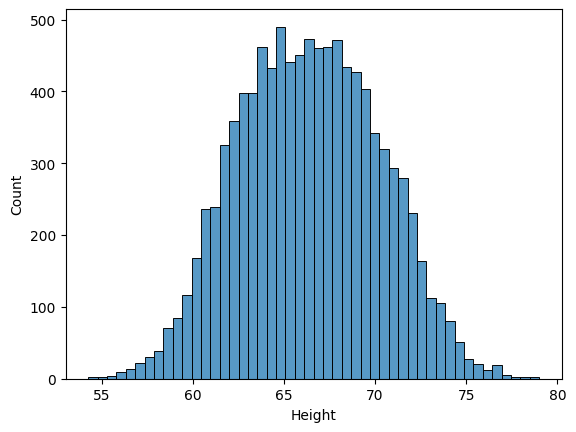

In [ ]:
sns.histplot(df_height)         # distribution

### **(2) Sample Dataset**

**Analysis of sample size 5**

In [ ]:
'''
> Analysis of sample size 5:
	- data.sample(5)	#random selection of 5 rows from the population dataset
	- np.mean(data.sample(5))	#mean of one sample mean (NOTE: every time, this mean is different & is close to the population mean of 66.3)
	- sample_mean_5 = [np.mean(data.sample(5)) for i in range(20000)]	#mean of 20000 sample means using list comprehension
	- len(sample_mean_5)	#length of mean of 20000 sample means
	- sns.histplot(sample_mean_5)		#distribution
	- np.mean(sample_mean_5)	#Mean of sample means ≈ mean of population
 	- np.std(sample_mean_5)		#Std dev of sample < Std dev of population
 (NOTE: Standard Error (i.e. Standard deviation of the sample mean): As the number of sample size increases, the "Std dev of sample < Std dev of 	population".
  This is called as "Standard Error" with the formula "sigma/sqrt(n)")
	- sigma/np.sqrt(5)		#"Standard Error" for n = 5
 '''

'\n> Analysis of sample size 5:\n\t- data.sample(5)\t#random selection of 5 rows from the population dataset\n\t- np.mean(data.sample(5))\t#mean of one sample mean (NOTE: every time, this mean is different & is close to the population mean of 66.3)\n\t- sample_mean_5 = [np.mean(data.sample(5)) for i in range(20000)]\t#mean of 20000 sample means using list comprehension\n\t- len(sample_mean_5)\t#length of mean of 20000 sample means\n\t- sns.histplot(sample_mean_5)\t\t#distribution\n\t- np.mean(sample_mean_5)\t#Mean of sample means ≈ mean of population\n \t- np.std(sample_mean_5)\t\t#Std dev of sample < Std dev of population\n (NOTE: Standard Error (i.e. Standard deviation of the sample mean): As the number of sample size increases, the "Std dev of sample < Std dev of \tpopulation".\n  This is called as "Standard Error" with the formula "sigma/sqrt(n)")\n\t- sigma/np.sqrt(5)\t\t#"Standard Error" for n = 5\n '

In [ ]:
df_height.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [ ]:
df_height.sample(5)         # random selection of 5 rows from the population dataset

5523    68.259311
8716    64.741425
3074    68.858680
4551    68.186157
14      69.243732
Name: Height, dtype: float64

In [ ]:
np.mean(df_height.sample(5))        # mean of one sample mean (NOTE: every time, this mean is different & is close to the population mean of 66.3)

68.70616213546569

<Axes: ylabel='Count'>

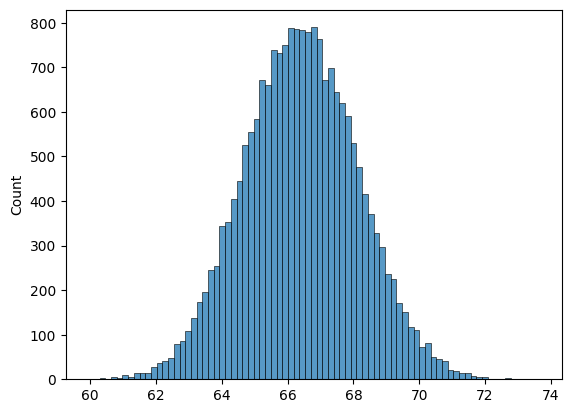

In [ ]:
sample_mean_5 = [np.mean(df_height.sample(5)) for i in range(20000)]          # "List Comprehension" - mean of 20000 sample means
len(sample_mean_5)          # each of these numbers represents a sample mean of sample size 5
sns.histplot(sample_mean_5)         # distribution

In [ ]:
np.mean(sample_mean_5)          # Mean of sample means ≈ mean of population

66.4003074791223

In [ ]:
np.std(sample_mean_5)         # Std dev of sample < Std dev of population

1.727190461055194

In [ ]:
# (sigma = std of the population) / (square root of sample size)
sigma/np.sqrt(5)          # "Standard Error" for n = 5

1.7206668846781923

**Analysis of sample size 20**

In [ ]:

'''
> Analysis of sample size 20:
	- (Same as above steps but take the random selection of 20 rows)
'''

'\n> Analysis of sample size 20:\n\t- (Same as above steps but take the random selection of 20 rows)\n'

In [ ]:
df_height.sample(20) #random selection of 20 rows

3084    65.914971
6077    61.781452
9981    60.443264
1298    69.702258
8440    61.662367
9455    63.571404
8630    68.423169
3221    64.766566
5007    65.652156
2671    66.351331
3659    70.485749
4829    70.378608
5146    65.182239
869     67.697104
7209    61.309108
9915    60.063144
6098    66.813681
4266    71.879538
9751    65.908350
7807    62.409264
Name: Height, dtype: float64

In [ ]:
np.mean(df_height.sample(20))

66.67154668729111

In [ ]:
sample_mean_20 = [np.mean(df_height.sample(20))  for i in range(20000)]

In [ ]:
len(sample_mean_20)

20000

<Axes: ylabel='Count'>

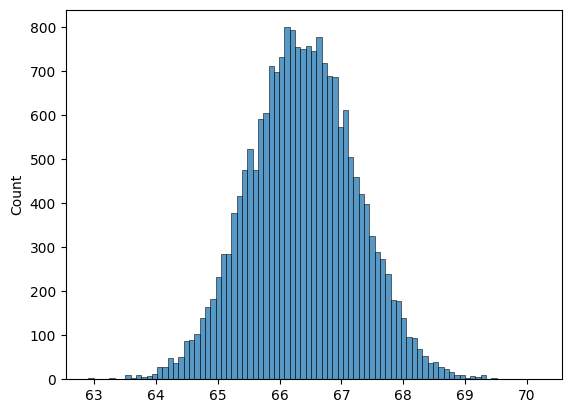

In [ ]:
sns.histplot(sample_mean_20)

In [ ]:
np.mean(sample_mean_20)

66.36741057999943

In [ ]:
np.std(sample_mean_20)

0.867169335542693

In [ ]:
sigma/np.sqrt(20) #standard error for n = 20

0.8603334423390961

**Analysis of sample size 100**

In [ ]:
'''
> Analysis of sample size 100:
	- (Same as above steps but take the random selection of 100 rows)
'''

'\n> Analysis of sample size 100:\n\t- (Same as above steps but take the random selection of 100 rows)\n'

In [ ]:
np.mean(df_height.sample(100))

66.22824102049599

In [ ]:
sample_mean_100 = [np.mean(df_height.sample(100))  for i in range(20000)]

In [ ]:
len(sample_mean_100)

20000

<Axes: ylabel='Count'>

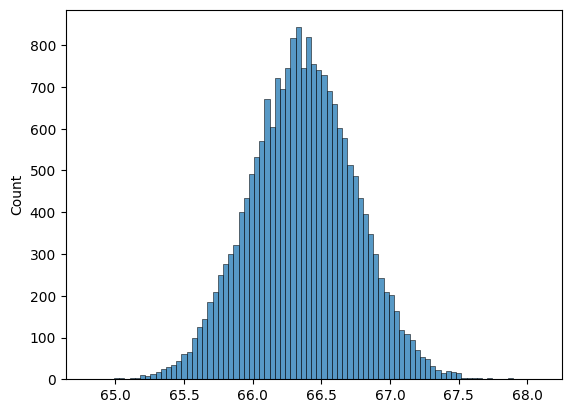

In [ ]:
sns.histplot(sample_mean_100)

In [ ]:
np.mean(sample_mean_100)

66.36269185132467

In [ ]:
np.std(sample_mean_100)

0.38144237730716213

In [ ]:
sigma/np.sqrt(100)  #standard error for n = 100

0.3847528120773229

**Standard-Error (i.e. standard deviation of Sample Means)**

As the **sampe size ↑** , the **standard deviation of sample mean ↓** , which is also known as **"Standard Error"**.

### **(3) Formula & Industry Standards**

In [ ]:
'''
Formula:
	Let "x̄ = (x1+x2+x3+...+xn)/n" denotes the sample mean.
	Then x̄ follows a normal/gaussian distribution with expected mean.
	That is, "E(x̄)=μ" where "E(x̄)" is expected mean and "μ" is population mean.
	And, Standard deviation of "x̄ = σ / √n"
In other words, x̄ ≈ N(μ, σ/√n)
	That is, x̄ follows a Normal/Gaussian Distribution as "N" with mean as "μ" and std dev as "σ/√n"
'''

### **(4) When will dataset be "Gaussian Distributed/Normal" ???**
**`Very IMP:`**         
When ever you take a **sample size of the dataset greater than 30**, then given any dataset which is **either Gaussian Distributed or Not**, when we take a **sample mean and plot the means of the samples**, then it becomes **"Gaussian Distribution/Normal"**.

In [ ]:
'''
NOTE: If n is large (n > 30), then sigma "σ" is finite. That is, original distribution need not be normal distribution...
'''

### **(5) Quizzes**

In [ ]:
# Quiz-1
'''
Systolic blood pressure of a group of people is known to have an average of 122 mmHg and a standard deviation of 10 mmHg. (assume normal distribution)
Calculate the probability that the average blood pressure of 16 people will be greater than 125mmHg.
'''

In [ ]:
z = (125 - 122)/2.5       #Z-Score

In [ ]:
ans = 1 - norm.cdf(z)       #Fraction value on y-axis

In [ ]:
print(ans)

0.11506967022170822


In [ ]:
# Quiz-2
'''
Weekly toothpaste sales have a mean 1000 and std dev 200. (assume normal distri)
What is the probability that the average weekly sales next month is more than 1110?
'''

In [ ]:
std_err = 200/np.sqrt(4)

In [ ]:
z = (1110 - 1000)/std_err

In [ ]:
prob_less = norm.cdf(z)

In [ ]:
prob_more = 1 - prob_less

In [ ]:
prob_more

0.13566606094638267

### **`[IMP]`: Customized Code as per Industry Standard**

In [ ]:
'''
Customized Code:
---------------------
	def clt_prob(mu , sigma, n, obs):
  		std_err = sigma/np.sqrt(n)
  		z = (obs - mu)/std_err
  		prob_less = norm.cdf(z)
  		prob_greater = 1 - norm.cdf(z)
  		return prob_less, prob_greater
	#blood pressure
	clt_prob(122, 10, 16, 125)
	#toothpaste
	clt_prob(1000, 200, 4, 1110)
'''

In [ ]:
def clt_prob(mu , sigma, n, obs):
  std_err = sigma/np.sqrt(n)
  z = (obs - mu)/std_err
  prob_less = norm.cdf(z)
  prob_greater = 1 - norm.cdf(z)
  return prob_less, prob_greater

In [ ]:
#blood pressure
clt_prob(122, 10, 16, 125)

(0.8849303297782918, 0.11506967022170822)

In [ ]:
#toothpaste
clt_prob(1000, 200, 4, 1110)

(0.8643339390536173, 0.13566606094638267)

In [ ]:
# Quiz-3
'''
In an e-commerce website, the average purchase amount per customer is
15.
If we randomly select a sample of 50 customers,
what is the probability that the average purchase amount in the sample will be less than $75?
'''

In [ ]:
clt_prob(80, 15, 50, 75)

(0.009211062727049501, 0.9907889372729505)

# <center>`Part 2.4:` **Confidence interval**</center>
***

In [ ]:
from scipy.stats import norm

## **Recap - Gaussian and CLT**



### **Purchase time**

The average time taken for customers to complete a purchase is 4 minutes with a standard deviation of 1 minute. Find the probability that a randomly selected customer will complete a purchase within 6 minutes?
Assume Gaussian

In [ ]:
z = (6-4)/1

In [ ]:
norm.cdf(z)

0.9772498680518208

In [ ]:
# In short:
norm.cdf((6 - 4) / (1))

0.9772498680518208

What is the probability that the average time of the next 5 customers is less than 6 minutes?


In [ ]:
sigma = 1
n = 5
sigma_sample = sigma/np.sqrt(n)
z = (6-4)/sigma_sample

norm.cdf(z)

0.9999961278917845

In [ ]:
# In short:
norm.cdf((6 - 4) / (1/np.sqrt(5)))

0.9999961278917845

### **Purchase amount**
The average order value on an e-commerce website is 50, with a standard deviation of 5. What is the probability that a randomly selected order will have a value exceeding 60?

In [ ]:
z = (60-50)/5
1- norm.cdf(z)

0.02275013194817921

In [ ]:
# In short:
1 - norm.cdf((60-50)/(5))

0.02275013194817921

The average order value on an e-commerce website is 50, with a standard deviation of 5. What is the probability that the average of the next 3 orders exceeds 60?

In [ ]:
sigma = 5
n = 3
sigma_sample = sigma/np.sqrt(n)
z = (60-50)/sigma_sample
1 - norm.cdf(z)

0.00026600275256960515

In [ ]:
# In short:
1 - norm.cdf((60-50)/(5/np.sqrt(3)))

0.00026600275256960515

### **Body temperature**
Average body temperature has a mean of 98.6°F and a standard deviation of 0.5°F. What is the probability that a randomly chosen patient has a body temperature higher than 99.5°F?

In [ ]:
1 - norm.cdf((99.5 - 98.6)/0.5)

0.03593031911292488

## **Confidence Interval using CLT**

### **Height**

The mean height of a sample of 100 adults was found to be 65 inches, with a standard deviation of 2.5 inches. What is the mean height of the population?

In [ ]:
sigma = 2.5     # sample standard deviation
sample_mean = 65
n = 100

In [ ]:
std_error = sigma/np.sqrt(n)
std_error

0.25

In [ ]:
# NOTE: We need to find 95% condifence interval & due to which on the left side of the Gaussian distribution will be 2.5% and on the right side 2.5%, which makes it 5% total.
z1 = norm.ppf(0.025)
z1

-1.9599639845400545

In [ ]:
z2 = norm.ppf(0.975)
z2

1.959963984540054

In [ ]:
x1 = 65 + z1 * std_error
x1

64.51000900386498

In [ ]:
x2 = 65 + z2 * std_error
x2

65.48999099613502

With 95% confidence (there is 95% probability) , we can say that the true mean (the mean height of the population) will be in the range [64.51 , 65.49]

That is, **`95% confidence interval --> [64.51, 65.49]`**

Compute the 90% confidence interval



In [ ]:
z1 = norm.ppf(0.05)
z2 = norm.ppf(0.95)

In [ ]:
x1 = 65 + z1 * std_error
x2 = 65 + z2 * std_error

In [ ]:
print(x1, x2)

64.58878659326213 65.41121340673787


In [ ]:
# In short:
65 + norm.ppf(0.05) * std_error

64.67102927460971

In [ ]:
# In short:
65 + norm.ppf(0.95) * std_error

65.32897072539029

With 90% confidence, the mean height of the population will be in the range [64.59, 65.41]

### **Recovery days**
The sample mean recovery time of 100 patients after taking a drug was seen to be 10.5 days with a standard deviation of 2 days. Find the 95% confidence interval of the true mean.

In [ ]:
std_error = 2/np.sqrt(100)
std_error

0.2

In [ ]:
z1 = norm.ppf(0.025)
x1 = 10.5 + z1 * std_error
x1

10.108007203091988

In [ ]:
z2 = norm.ppf(0.975)
x2 = 10.5 + z2 * std_error
x2

10.89199279690801

In [ ]:
# create function at the end
def calc_CI(mean, std, N, prob):

    std_err = std / np.sqrt(N)
    print("SE ", std_err)

    slice = (1 - (prob/100))/2
    print("slice ", slice)

    z1 = norm.ppf(slice)
    print("z1 ", z1)

    z2 = norm.ppf(1-slice)
    print("z2 ", z2)

    x1 = mean + ( z1 * std_err)
    x2 = mean + ( z2 * std_err)

    return x1, x2

In [ ]:
calc_CI(10.5, 2, 100, 95)

SE  0.2
slice  0.025000000000000022
z1  -1.959963984540054
z2  1.959963984540054


(10.10800720309199, 10.89199279690801)

In [ ]:
# summarizing the steps
sample_mean = 10.5
n = 100
sigma = 2

std_error = sigma/np.sqrt(100)
std_error

z1 = norm.ppf(0.025)
z2 = norm.ppf(0.975)

x1 = 10.5 + z1*std_error
x2 = 10.5 + z2*std_error

print(x1, x2)

10.108007203091988 10.89199279690801


In [ ]:
# Alternative short-cut
norm.interval(confidence=0.95, loc = 10.5, scale = 2/np.sqrt(100))

(10.10800720309199, 10.89199279690801)

### **Youtube watch hours**

The mean Youtube watch time of a sample of 100 students was found to be 3.5 hours, with a standard deviation of 1 hour. Construct a 90% confidence interval for the true watch time.

In [ ]:
calc_CI(3.5, 1, 100, 90)

SE  0.1
slice  0.04999999999999999
z1  -1.6448536269514729
z2  1.6448536269514722


(3.3355146373048528, 3.6644853626951472)

In [ ]:
# Alternative short-cut
norm.interval(confidence=0.90, loc = 3.5, scale = 1/np.sqrt(100))

(3.3355146373048528, 3.6644853626951472)

In [ ]:
import scipy
scipy.__version__

'1.11.3'

## **Confidence interval using Bootstrap**

In [ ]:
survey_1 = [35, 36, 33, 37, 34, 35] #less variance
np.mean(survey_1)

35.0

In [ ]:
survey_2 = [20, 37, 17, 50, 53, 33]
np.mean(survey_2)

35.0

Can we simulate more and more sets of samples like the ones above



In [ ]:
np.random.choice(survey_1)

34

In [ ]:
#sample with replacement
n = 6
np.random.choice(survey_1, size = n)

array([37, 37, 35, 37, 36, 33])

In [ ]:
np.random.choice(survey_1, size = n)

array([36, 36, 37, 35, 34, 35])

In [ ]:
n = 6
bootstrapped_samples = np.random.choice(survey_1, size=n)
np.mean(bootstrapped_samples)

36.166666666666664

In [ ]:
bootstrapped_samples = np.random.choice(survey_2, size=n)
np.mean(bootstrapped_samples)

29.5

In [ ]:
bootstrapped_means_survey_1 = []
for reps in range(10000):
  bootstrapped_samples = np.random.choice(survey_1, size = n)
  bootstrapped_mean = np.mean(bootstrapped_samples) #median, any statitical function
  bootstrapped_means_survey_1.append(bootstrapped_mean)

<Axes: ylabel='Count'>

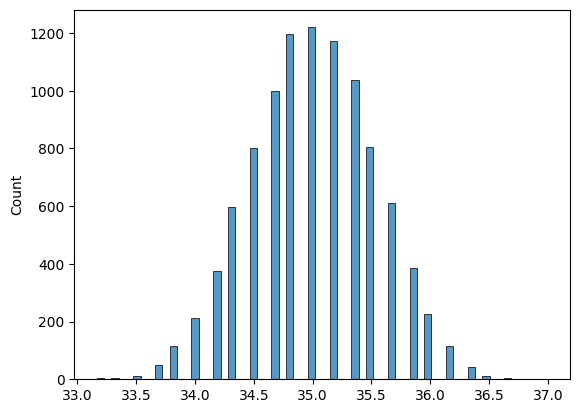

In [ ]:
sns.histplot(bootstrapped_means_survey_1)

In [ ]:
len(bootstrapped_means_survey_1)

10000

In [ ]:
bootstrapped_means_survey_1[:5]

[35.0, 34.833333333333336, 35.5, 35.0, 35.0]

In [ ]:
# survey2

In [ ]:
bootstrapped_means_survey_2  = []
for i in range(10000):
  bootstrapped_samples = np.random.choice(survey_2, size = n)
  bootstrapped_mean = np.mean(bootstrapped_samples)
  bootstrapped_means_survey_2.append(bootstrapped_mean)

<Axes: ylabel='Count'>

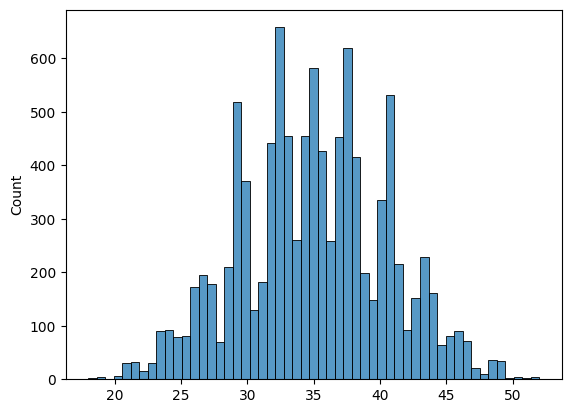

In [ ]:
sns.histplot(bootstrapped_means_survey_2)

With 90% confidence interval --> true mean of the population

In [ ]:
x1 = np.percentile(bootstrapped_means_survey_1, 2.5) #getting the 2.5th percentile of this bootstrapped sample
x1

34.0

In [ ]:
x2 = np.percentile(bootstrapped_means_survey_1, 97.5)
x2

36.0

With 95% confidence, the mean salary of the population will be [34.0 , 36.0]

In [ ]:
len(bootstrapped_means_survey_2)

10000

In [ ]:
x1 = np.percentile(bootstrapped_means_survey_2, 2.5)
x2 = np.percentile(bootstrapped_means_survey_2, 97.5)

print(x1, x2)

24.0 46.0


For survery_2, with 95% confidence, the mean salary of the population will be [24.0 , 46.0]

# <center>`Part 3.1:` **Combinatorics `(Permutations & Combinations)`**</center>
***

### **Q1. Keep Revising**

A Machine Learning course contains **5** ‘Supervised Learning’, **6** ‘Unsupervised Learning’, and **2** ‘Reinforcement Learning’ modules. One of the students wants to revise these topics and picks **two** modules at random.

Find the probability that one module is of ‘Unsupervised Learning’ and one is of ‘Supervised Learning’.

* 11/13
* 5/13
* 5/26
* 11/26

In [ ]:
# Combination --> (5C1 * 6C1) / 13C2 = (6 * 5) / (78) = 30 / 78 = 5/13
print(math.comb(5, 1) * math.comb(6, 1) / math.comb(13, 2))

0.38461538461538464


**Explanation:**

so think like this in numerator just try to find what asked in the qiestion for ex : here from 6 ‘Unsupervised Learning’, i want to pick so 6C1 then from 5 ‘Supervised Learning i want any one so 5C1

and in denominator just blindly TOTAL possiblities that is : Total Courses [13] and choose any 2 so 13C2

so ans will be 6C1 * 5C1 / 13C2

### **Q2. Student Committee**

In a school, from a students committee of **10** persons, one **President**, one **treasurer**, and one **secretary** are to be chosen. No person can hold two posts at a time.

In how many ways can this happen?

* 880
* 1000
* 120
* 720

In [ ]:
# Permutation --> 10P3 = 10! / (10 - 3)!
print(math.perm(10, 3))

720


### **Q3. Give a Medal**

A student participates in **four** different sports on Sport’s Day at her school. Each sport has three medals assigned, **gold**, **silver**, and **bronze**.

It is possible that the student wins no medals. How many possible ways can she get **at least one** medal?

* 80
* 255
* 81
* 256

In [ ]:
# Multiplication rule --> AND
print(4 * 4 * 4 * 4 - 1)

255


**Explanation:**

There are four games or sports. For each sport, three medals are assigned, and it is also possible that the student gets no medal. Hence, each game can have four outcomes (repetition allowed).

i.e. In the first game, she can win one of the three medals, or lose. In the same way, she can win one of the three medals or lose in the second, third and fourth games as well. However, we should not count the possibility that she loses all four games, since the question states that we have to count only those possibilities where she at least wins one medal.

Hence, she can get a medal in 4^4-1 = 255 ways.

### **Q4. Creating Passwords**

How many **five-character-long** passwords can be created such that the first two characters can use any digit from **0 to 9**, and the last three characters can use letters from **A to Z**?

* 1,581,840
* 1,560,000
* 1,757,600
* 1,263,600

In [ ]:
# Multiplication rule --> AND
print(10 * 10 * 26 * 26 * 26)

1757600


### **Q5. Elite team**

A company wants to form an elite team of **5 members** to assign a particular project.

Suppose the company has **5** Data Scientists, **4** Data Engineers, and **6** Data Analysts.

Find the probability that the company will select a team that contains **2** Data Scientists, **1** Data Engineer, and **2** Data Analysts.

* 0.158
* 0.199
* 0.302
* 0.245

In [ ]:
# Combination --> (5C2 * 4C1 * 6C2)/15C5
print((math.comb(5, 2) * math.comb(4, 1) * math.comb(6, 2)) / math.comb(15, 5))

0.1998001998001998


### **Q6. Cars**

**Twenty** distinct cars park in the same parking lot every day. **Ten** of these cars are **India-made**. while the other **ten** are **foreign-made**.

The parking lot has exactly **twenty spaces** all in a row.

What is the probability that on a given day, the cars will park in such a way that they **alternate** (no two same cars are adjacent)?

a) 3.293e-8         
b) 1.829e-3           
c) 2.003e-7         
d) 1.082e-5        

* a)
* b)
* c)
* d)

In [ ]:
# Multiplication & Addition rules respectively  --> AND, OR
print((math.factorial(10) * math.factorial(10) * 2) / math.factorial(20))

1.082508822446903e-05


**Explanation:**

To find the probability that the cars will be parked so that they alternate, we first arrange the India-made cars in an ordered sequence (permutation).
We can do this in 10! ways, since there are 10 distinct cars.

Similarly, arrange the foreign cars in an ordered sequence, which can also be done in 10! ways.

Finally, this can be done in two different ways, since we can let the first car in the row be either India-made or foreign-made.

Thus, we have a total of 2 x 10! x 10! Possibilities.

The probability that the cars will be parked so that they alternate is

= 2∗10!∗10! / 20!        
= 2∗3628800∗3628800 / 2.432902e18           
= 1.082e−5

### **Q7. Not to include 5s**

Suppose you’re making a list of **three digit** numbers.

Answer the following questions:

i) How many three digit numbers are there that **do not contain 5**?
ii) Which contain 5 **at least** once?
iii) Which contains 5 **at most** once?

* 648, 252, 873
* 729, 873, 252
* 648, 252, 874
* 729, 873, 253

# <center>`Part 3.2:` **Binomial and Geometric distributions**</center>
***

**Interview** --> Probability of Success **≠** 100% at good companies.

Hence, Probability of Success maybe 10% or 20%.

**Strategies** --> Multiple companies

1.   Give **10 interviews** --> pick the **best offer letter**  **`(Binomial)`**
2.   **Keep giving interviews** till your **first success** **`(Geometric)`**

## **Strategy 1: (Binomial distribution)**

(1) Fixed no. of interview `(no. of trials)` --> "n" `(n = 10)`

(2) Success prob is constant --> "p" `(p = 0.1 or p = 0.2)`

(3) Each interview/trial is independent of another.

    X: number of successes (no. of offer letters)

**`NOTE:`**
> **Binomial means** --> each trial has a fixed prob of success and we are counting the number of success

> **Bernouli** --> its a special case of **Binomial** with **n=1** (only 1 trial)

> **`IMP to know:`** **Multinomial** --> So far we have seen that **two outcomes** with **one event** (ex: Coin touse - Head or Tail), but if we do **three outcomes** with **one event**, its calles **Multinomial**

### **One interview --> One trial**

n = 1 **`(Fixed no. of interview (trial))`**        
p = 0.1 **`(Success prob is constant)`**         
x = {0, 1} **`(No. of success)`**      
p[x = 0] = 0.9 **`(NO offer letter)`**    
p[x = 1] = 0.1 **`(cleared & got offer letter)`**       
Bar plor **`(Probability Mass Function (PMF))`**


In [ ]:
'''
Suppose you are giving one interview. Let X denote the number of offer letters you can get.
What are all the possible values that X can take?
'''

In [ ]:
n = 1     # no. of interview = 1
p = 0.1     # prob of success (10%)
x_vals = [0, 1]     # number of success (i.e. offer-letters)

In [ ]:
probs = [1-p, p]      # prob of 0 or 1 offer letter
probs

[0.9, 0.1]

<Axes: >

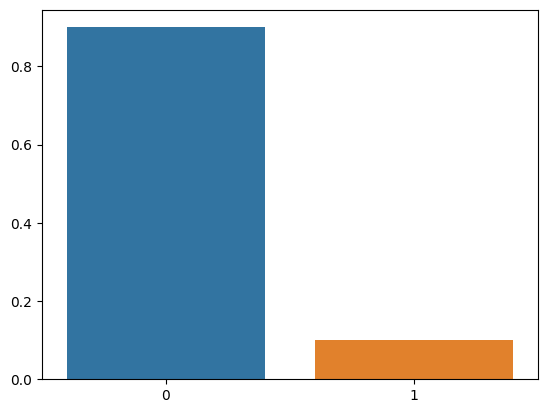

In [ ]:
sns.barplot(x = x_vals, y = probs)      # PMF (Probability Mass Function)

In [ ]:
# For one trial, this probability mass function represents "Bernouli Distribution"
# "Bernouli" is a special case of Binomial with n = 1

### **Two interview --> Two trials**

**Question:** Suppose you are giving two interviews. Let X denote number of offer letters you can get. What are all the possible values that X can take?

**Answer:** {0, 1, 2}

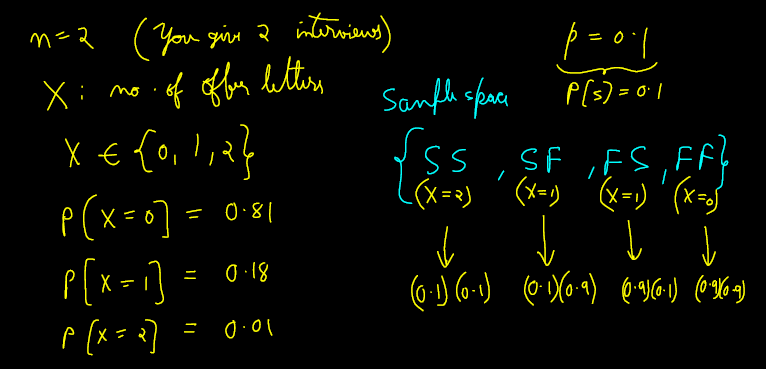

In [ ]:
n = 2
p = 0.1
x_vals = [0, 1, 2]

In [ ]:
# Prob of no. of success using Sample Space
probs = [
    (1-p)*(1-p),      # prob of x = 0
    p*(1-p) + (1-p)*p,      # prob of x = 1
    (1-p)*(1-p)     # prob of x = 2
]

In [ ]:
probs

[0.81, 0.18000000000000002, 0.81]

<Axes: >

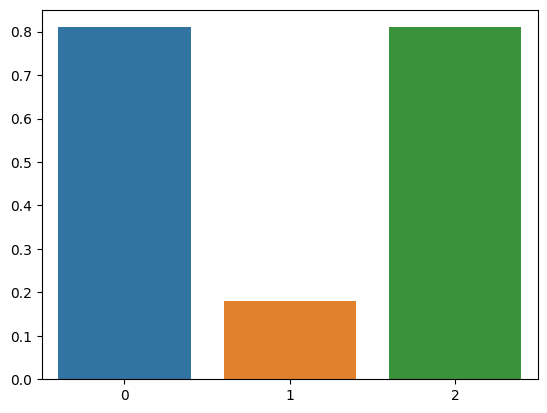

In [ ]:
# PMF
sns.barplot(x = x_vals, y = probs)

### **Three interview --> Three trials**

**Question:** Suppose you are giving three interviews. Let X denote number of offer letters you can get. What are all the possible values that X can take?

**Answer:** {0, 1, 2, 3}

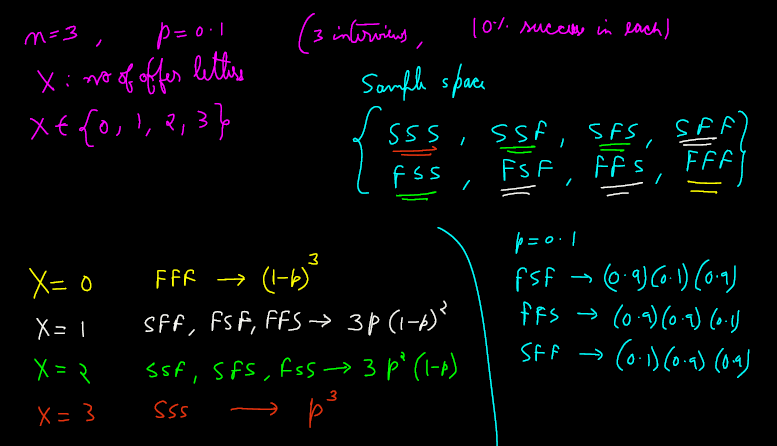

In [ ]:
n = 3
p = 0.1
x_vals = [0, 1, 2, 3]

In [ ]:
probs = [
    (1-p)*(1-p)*(1-p),      # prob for x = 0
    (1-p)*(1-p)*p + (1-p)*p*(1-p) + p*(1-p)*(1-p),      # prob of x = 1
    (1-p)*p*p + p*(1-p)*p + p*p*(1-p),      # prob x = 2
    p*p*p     # prob for x = 4
]

In [ ]:
probs

[0.7290000000000001,
 0.24300000000000005,
 0.027000000000000003,
 0.0010000000000000002]

<Axes: >

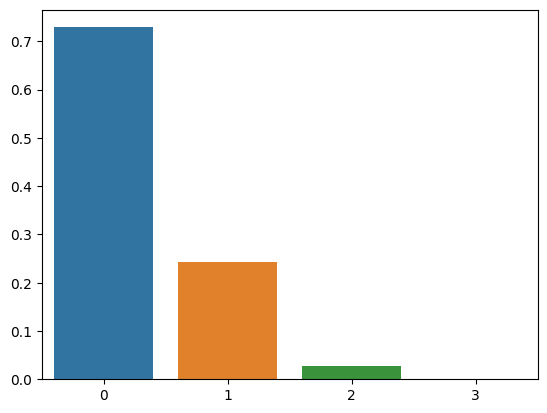

In [ ]:
sns.barplot(x = x_vals, y = probs)

> **`NOTE:`**          
**Quicker solution using "`from scipy.stats import binom, geom`"**

<Axes: >

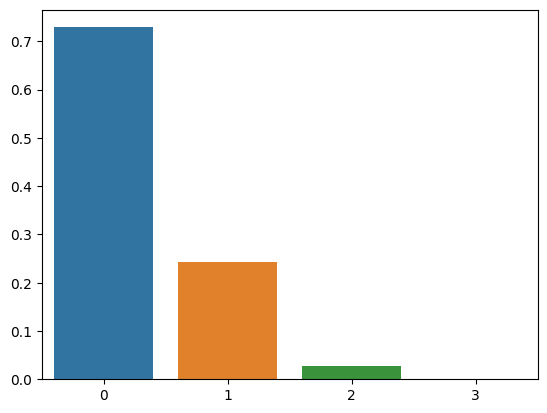

In [ ]:
probs_binom = binom.pmf(x_vals, n = 3, p = 0.1)
sns.barplot(x = x_vals, y = probs_binom)

In [ ]:
print(probs_binom)

[0.729 0.243 0.027 0.001]


In [ ]:
# Finding the individual prob of success of no. of success
a = binom.pmf(0, n= 3, p = 0.1)
print(a)

0.729


In [ ]:
a = binom.pmf([0,1], n= 3, p = 0.1)
print(a)

[0.729 0.243]


### **N trials**

**Question:** Suppose you are giving "n" interviews. Let X denote number of offer letters you can get. What are all the possible values that X can take?

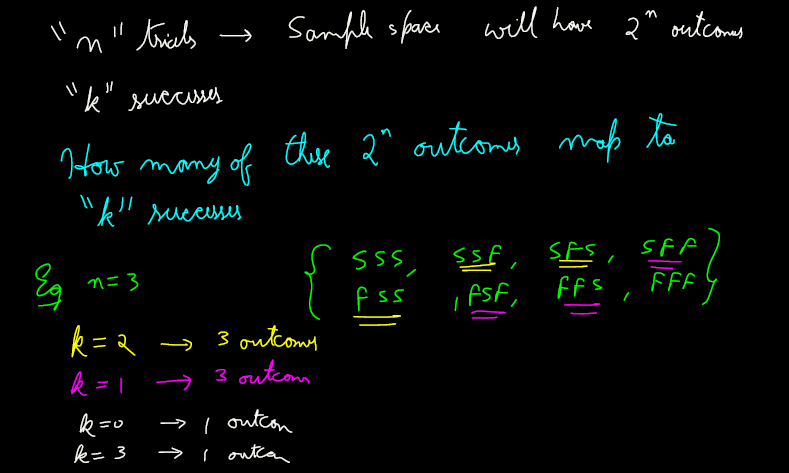

<Axes: >

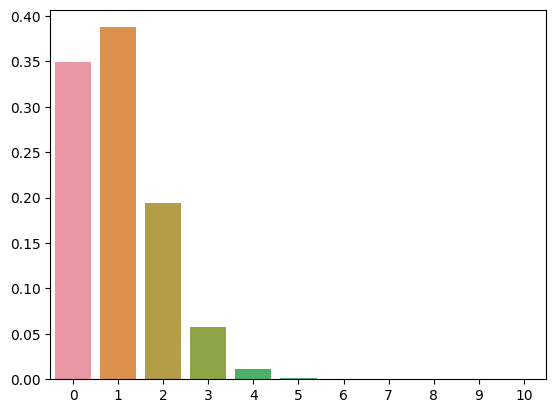

In [ ]:
n = 10
p = 0.1
x_vals = np.arange(0, n+1)
probs_binom = binom.pmf(x_vals, n = n, p = p)
sns.barplot(x = x_vals, y = probs_binom)

#HW - try to change n and p and observe the pattern

### **Binomial Formula --> `(No. of outcomes maping the k-success)`**

Finding the individual prob of success of no. of success.

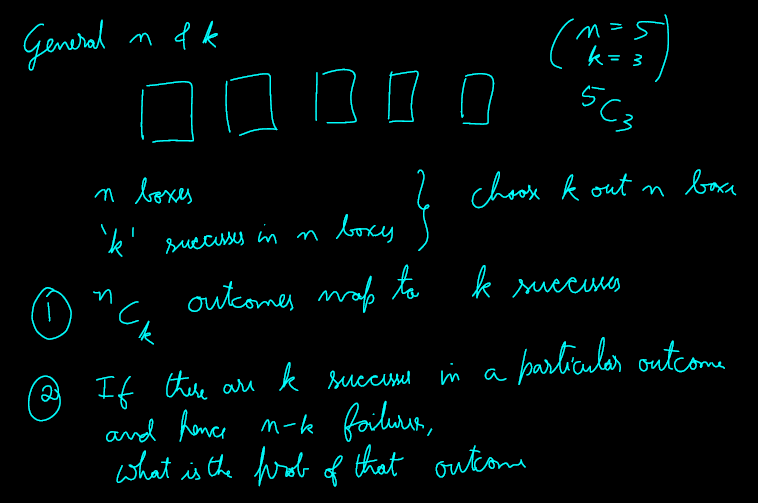

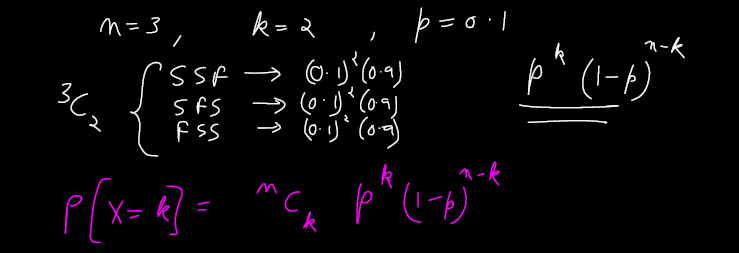

In [ ]:
n = 15
p = 0.1

In [ ]:
binom.pmf(k = 3, n = 15, p = 0.1)     #p(x = k) = nck * p^k * (1-p)^(n-k)

0.1285054390988551

In [ ]:
# Alternative approach
math.comb(15,3)*p**3*(1-p)**(n-3)

## **Strategy 2: (Geometric distribution)**

Here we are interested in **no.of interviews** as **no. of offer letter** is **fixed to 1 - first success**

    X: no of interviews till first success

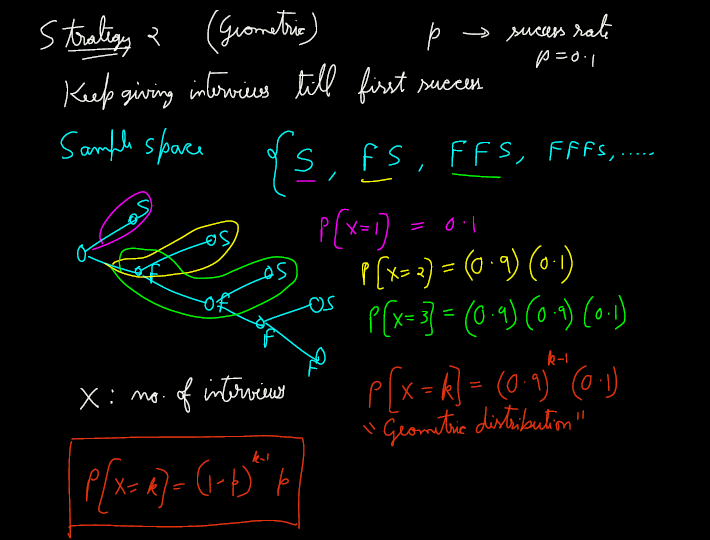

In [ ]:
p = 0.1

In [ ]:
x_vals = np.arange(1, 20)     # technically, infinite values

<Axes: >

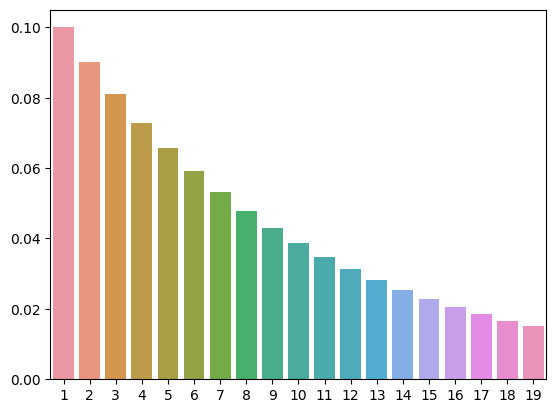

In [ ]:
probs_geom = geom.pmf(x_vals, p = p)
sns.barplot(x = x_vals, y = probs_geom)

## **Binomial CDF**

Messi and penalty: Success rate is 80%

He kicks 10 times. What is the probability of having 7 or less successes?

In [ ]:
n = 10
p = 0.8

In [ ]:
binom.cdf(k=7, n=n, p=p)

0.32220047359999987

In [ ]:
np.sum([binom.pmf(k=i, n=n, p=p) for i in np.arange(0, 8)]) #adding all the pmf from 0 to 7 (k)
#cdf is sum of individual pmfs (usually when <= asked --> cumulative)

0.3222004735999996

In [ ]:
prob = 0
for i in range(8):
    prob += binom.pmf(k=i, n=n, p=p)
prob

0.3222004735999996

In [ ]:
# usually we will solve x<=4 types of questions using complement : 1- x<= format as cdf is avialalbe which captures 0 to x=k in one go

In [ ]:
# practical usecase of Gemoetric - as an HR how many intervaiews shall I take to get my first hire candidate

## **Quizes**

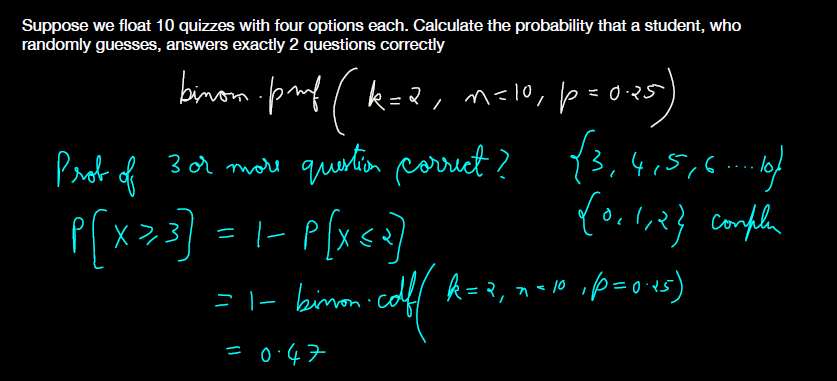

**Q. Suppose we float 10 quizzes with four options each. Calculate the probability that a student, who randomly guesses, answers exactly 2 questions correctly**

In [ ]:
n = 10
p = 0.25
k = 2

In [ ]:
probs_binom = binom.pmf(k = k, n = n, p = p)
probs_binom

0.28156757354736334

**Q. Prob of 3 or more question correct?**

In [ ]:
probs_binom = 1 - binom.cdf(k = 2, n = 10, p = 0.25)
probs_binom

0.4744071960449219

# <center>**Data Analytics and Visualisation - Fundamentals**</center>
***

**Part 1**
  - Hypothesis Testing Framework
  - Z-test
  - T-test
  - Chi-squared test
  - ANOVA
  - Correlation test

**Part 2**
  - Advanced Distributions - 1
  - Advanced Distributions - 2

**Part 3**
  - Feature Engineering - 1
  - Feature Engineering - 2

# <center>`Part 1.1:` **Hypothesis Testing Framework**</center>
***
**(1) Null (H0)** & **Alternative Hypothesis (Ha)**        
**(2) Test-statistics** & **Distribution**           
**(3) p-value**            
**(4) Significance level (α)**              
**(5) Confusion matrix** **`(True Positive, False Postive, False Negataive, True Negative)`**                          
**(6) Left-tailed test, Right-tailed test, Two-tailed test**        

## **Coin Toss**

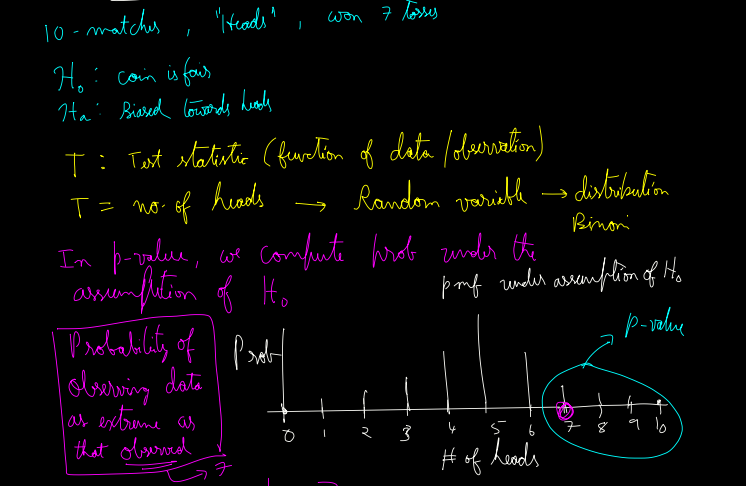

**10 matches, Heads, Won 7 tossess**

In [ ]:
# P[T>=7 | Ho] = 1 - P[T<= 6| H0]
p_value = 1 - binom.cdf(k = 6, n = 10, p = 0.5)
p_value

0.171875

**100 matches, Heads, Won 70 tossess**

In [ ]:
p_value = 1 - binom.cdf(k = 69, n = 100, p = 0.5)
p_value

3.925069822796612e-05

**1000 matches, Heads, Won 700 tossess**

In [ ]:
p_value = 1 - binom.cdf(k = 699, n = 1000, p = 0.5)
p_value

0.0

# <center>`Part 1.2:` **Z-test**</center>
***
**Frameworks:**              
**(1) Set up Null (H0)** & **Alternative Hypothesis (Ha)**        
**(2) Choose Test-statistics** **`(Binomial / Gaussian)`**           
**(3) Left `Vs` Right `Vs` Two-tailed Test**  
**(4) Compute p-value `(compute Critical Region)`**          
**(5) Compute p-value with Significance level (α) `(test statistics is in Critical Region)`**              
